# **Keras API Project with Lending Club dataset**
Th preprocessing has been done and the preprocessed CSV file will be loaded during the model building process


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
from google.colab import files
UploadedFiles = files.upload()

Saving Lending_club_preprocessed.csv to Lending_club_preprocessed.csv


In [3]:
df = pd.read_csv('Lending_club_preprocessed.csv')
df.head()

,Unnamed: 0,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT,5113,11650,22690,29597,30723,48052,70466,86630,93700
0,0,10000.0,36,11.44,329.48,117000.0,26.24,1990,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
1,1,8000.0,36,11.99,265.68,65000.0,22.05,2004,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2,15600.0,36,10.49,506.97,43057.0,12.79,2007,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
3,3,7200.0,36,6.49,220.65,54000.0,2.60,2006,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,4,24375.0,60,17.27,609.33,55000.0,33.95,1999,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# Train Test Split

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

Now I will normalise the data using MinMaxScaler

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Creation

In [10]:
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential


In [11]:
model = Sequential()

In [12]:
X_train.shape

(316175, 79)

In [14]:
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [15]:
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test))


Epoch 1/25
1236/1236 [==============================] - 7s 4ms/step - loss: 0.2880 - val_loss: 0.2655
Epoch 2/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2645 - val_loss: 0.2636
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2626 - val_loss: 0.2623
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2614 - val_loss: 0.2623
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2610 - val_loss: 0.2625
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2605 - val_loss: 0.2615
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2601 - val_loss: 0.2615
Epoch 8/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2598 - val_loss: 0.2621
Epoch 9/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2595 - val_loss: 0.2614
Epoch 10/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.259

In [16]:
from tensorflow.keras.models import load_model

In [17]:
model.save('lendingclub_abhay.h5')

# Evaluating the model

In [18]:
losses = pd.DataFrame(model.history.history)

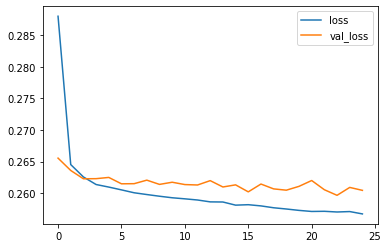

In [19]:
losses.plot()

In [20]:
from sklearn.metrics import confusion_matrix,classification_report

In [22]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [24]:
print(confusion_matrix(y_test,predictions))

[[ 6778  8880]
 [   51 63335]]
